<a href="https://colab.research.google.com/github/deekshithareddygoli/Data-Science-Internship-Project-1/blob/main/Analyzing_Amazon_Sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Collection and Preprocessing

In [ ]:
data = pd.read_csv('/content/Amazon Sales data.csv')

In [ ]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [ ]:
data.shape

(100, 14)

In [ ]:
data.index

RangeIndex(start=0, stop=100, step=1)

In [ ]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [ ]:
data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [ ]:
# Checking for missing values
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [ ]:
#Convert Order Date to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [ ]:
# Extract Year and Month from datetime
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


In [ ]:
#Calculating the number of Regions
regions = data['Region'].nunique()
print('Total Number of Regions:',regions)

Total Number of Regions: 7


In [ ]:
#Calculating the number of Countries
countries = data['Country'].nunique()
print('Total Number of Countries:',countries)

Total Number of Countries: 76


In [ ]:
# Calculating the number of types of items
item_type = data['Item Type'].nunique()
print('Number of Item Types:',item_type)

Number of Item Types: 12


In [ ]:
# Calculating the number of Units sold
units_sold = data['Units Sold'].sum()
print('Total Units Sold:',units_sold)

Total Units Sold: 512871


In [ ]:
# Calculating the number of Units Cost
unit_cost = data['Unit Cost'].sum()
print('Total Unit Cost:',unit_cost)

Total Unit Cost: 19104.8


In [ ]:
# Calculating the Total Revenue
tot_revenue = data['Total Revenue'].sum()
print('Total Revenue:',tot_revenue)

Total Revenue: 137348768.31


In [ ]:
# Calculating the Total Cost
tot_cost = data['Total Cost'].sum()
print('Total Cost:',tot_cost)

Total Cost: 93180569.91000001


In [ ]:
# Calculating the Total Profit
tot_profit = data['Total Profit'].sum()
print('Total Profit:',tot_profit)

Total Profit: 44168198.39999999


In [ ]:
data.groupby(['Region','Sales Channel'])['Total Profit'].sum()

Region                             Sales Channel
Asia                               Offline          3584286.33
                                   Online           2529559.54
Australia and Oceania              Offline          1886283.82
                                   Online           2835876.21
Central America and the Caribbean  Offline          2475814.99
                                   Online            371092.86
Europe                             Offline          5574539.91
                                   Online           5508398.72
Middle East and North Africa       Offline          2169081.08
                                   Online           3592110.78
North America                      Offline          1457942.76
Sub-Saharan Africa                 Offline          7772777.78
                                   Online           4410433.62
Name: Total Profit, dtype: float64

In [ ]:
data.groupby(['Region','Sales Channel'])['Total Cost'].sum()

Region                             Sales Channel
Asia                               Offline           8561811.43
                                   Online            6671433.72
Australia and Oceania              Offline           2315584.03
                                   Online            7056521.07
Central America and the Caribbean  Offline           5778297.20
                                   Online             545180.44
Europe                             Offline          12547946.54
                                   Online            9738046.94
Middle East and North Africa       Offline           2824057.80
                                   Online            5467456.92
North America                      Offline           4185413.79
Sub-Saharan Africa                 Offline          17960971.74
                                   Online            9527848.29
Name: Total Cost, dtype: float64

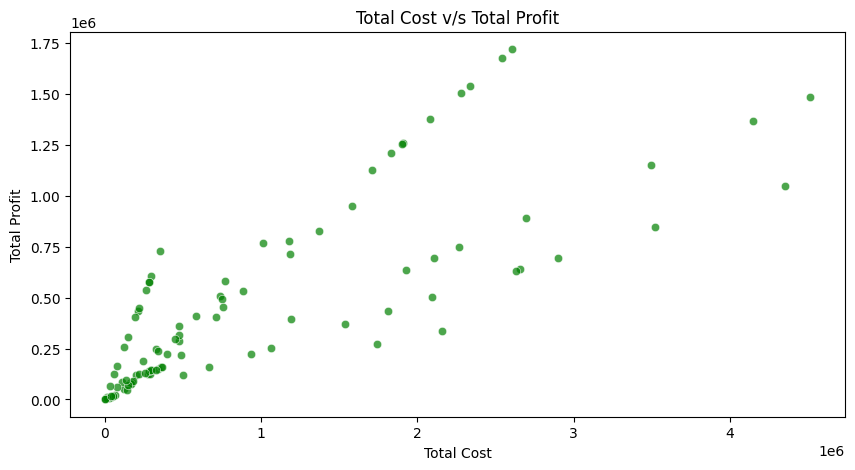

In [ ]:
plt.figure(figsize=(10,5))

sns.scatterplot(data=data, x='Total Cost',y='Total Profit',color='g',alpha=0.7)
plt.title('Total Cost v/s Total Profit')
plt.xlabel('Total Cost')
plt.ylabel('Total Profit')
plt.show()

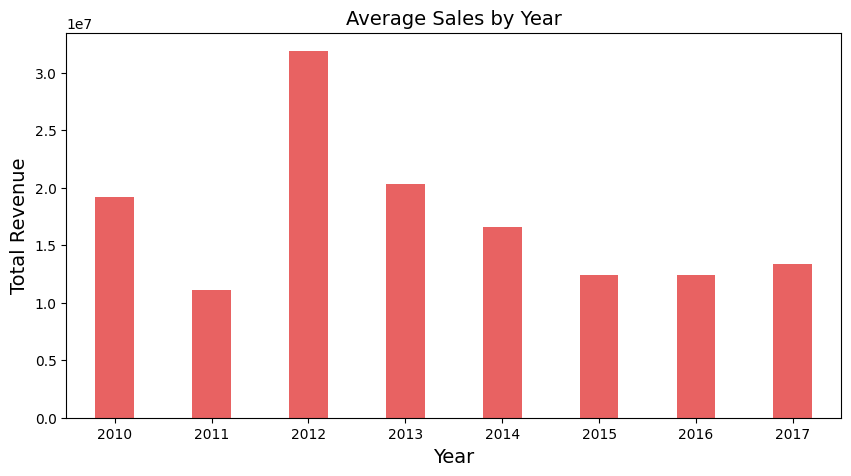

In [ ]:
plt.figure(figsize=(10,5))
year_sales = data.groupby('Year')['Total Revenue'].sum()
sns.barplot(x=year_sales.index,y=year_sales.values,color='r',width=0.4,alpha=0.7)
plt.title('Average Sales by Year',fontsize = 14)
plt.xlabel('Year',fontsize = 14)
plt.ylabel('Total Revenue',fontsize = 14)
plt.show()

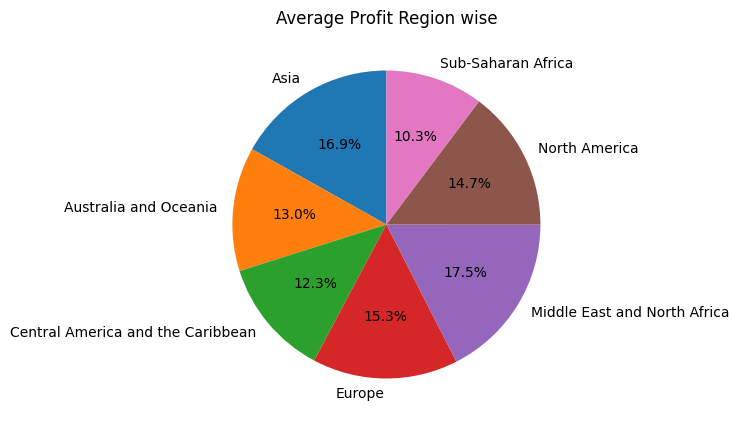

In [ ]:
plt.figure(figsize=(6,5))
region_TotalRevenue = data.groupby('Region')['Total Profit'].mean()
plt.pie(region_TotalRevenue,startangle=90,labels=region_TotalRevenue.index, autopct='%1.1f%%')
plt.title('Average Profit Region wise')
plt.show()

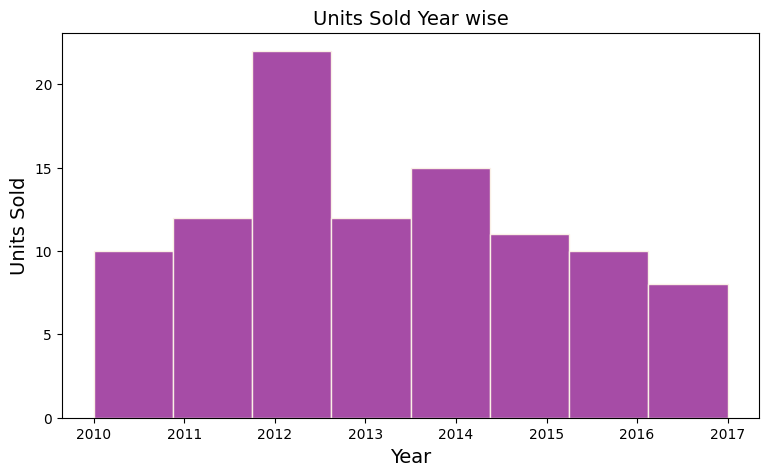

In [ ]:
plt.figure(figsize=(9,5))
sns.histplot(data=data,x='Year', color='purple',edgecolor ='linen',alpha=0.7)
plt.title('Units Sold Year wise',fontsize = 14)
plt.xlabel('Year',fontsize = 14)
plt.ylabel('Units Sold',fontsize = 14)
plt.show()

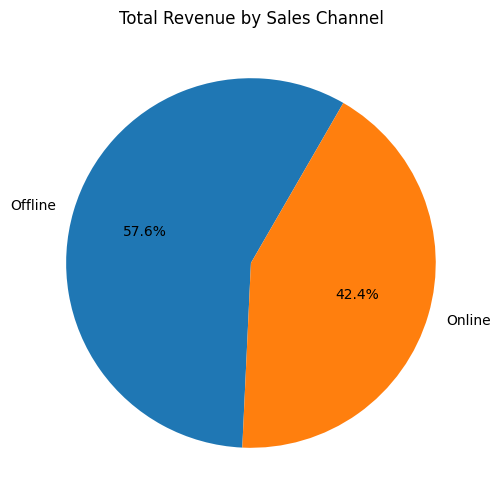

In [ ]:
plt.figure(figsize=(6,6))
sales_TotalRevenue = data.groupby('Sales Channel')['Total Revenue'].mean()
plt.pie(sales_TotalRevenue,startangle=60,labels=sales_TotalRevenue.index, autopct='%1.1f%%')
plt.title('Total Revenue by Sales Channel')
plt.show()

In [ ]:
data.groupby('Item Type')['Total Profit'].sum()

Item Type
Baby Food           3886643.70
Beverages            888047.28
Cereal              2292443.43
Clothes             5233334.40
Cosmetics          14556048.66
Fruits               120495.18
Household           7412605.71
Meat                 610610.00
Office Supplies     5929583.75
Personal Care       1220622.48
Snacks               751944.18
Vegetables          1265819.63
Name: Total Profit, dtype: float64

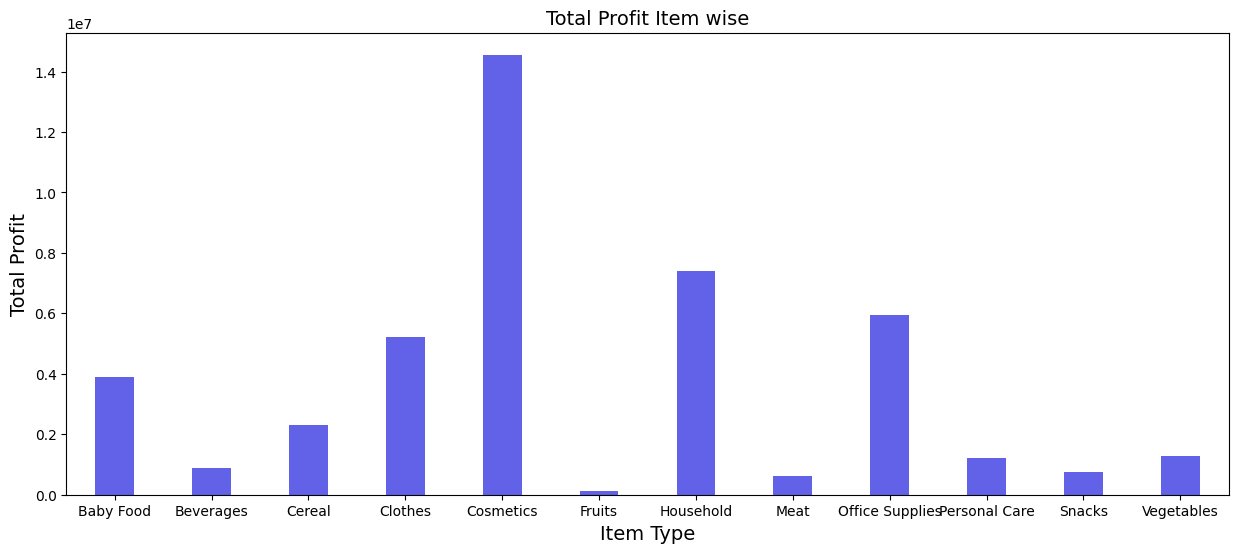

In [ ]:
plt.figure(figsize=(15,6))
profit_itemtype = data.groupby('Item Type')['Total Profit'].sum()
sns.barplot(x=profit_itemtype.index,y=profit_itemtype.values,color='b',width=0.4,alpha=0.7)
plt.title('Total Profit Item wise',fontsize = 14)
plt.xlabel('Item Type',fontsize = 14)
plt.ylabel('Total Profit',fontsize = 14)
plt.show()

<ipython-input-33-6c70a408c203>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=tot_cost.index,y=tot_cost.values,palette='bright')


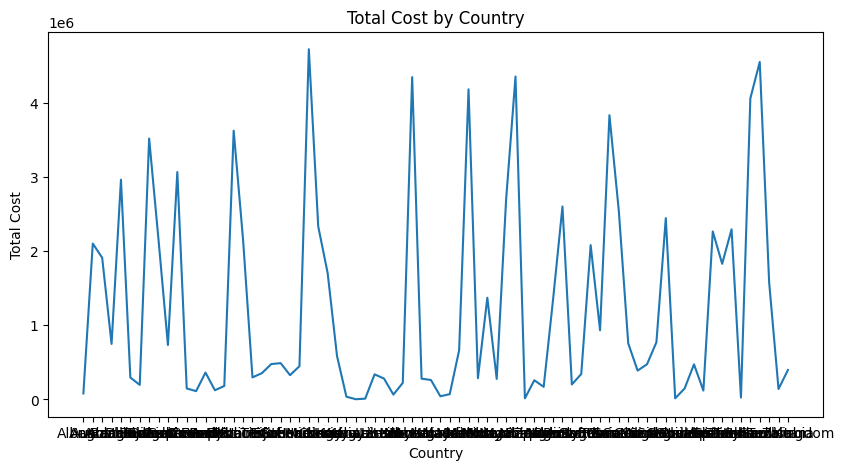

In [ ]:
plt.figure(figsize=(10,5))
tot_cost=data.groupby('Country')['Total Cost'].sum()
sns.lineplot(x=tot_cost.index,y=tot_cost.values,palette='bright')
plt.title('Total Cost by Country')
plt.xlabel('Country')
plt.ylabel('Total Cost')
plt.show()

In [ ]:
sales_data = data.copy()

In [ ]:
sales_data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit', 'Year',
       'Month'],
      dtype='object')

In [ ]:
sales_data.head()

,Region,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month
0,Australia and Oceania,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


In [ ]:
plt.figure(figsize=(8, 20))


Yearly-Monthwise Sales Trend


<Figure size 2000x800 with 0 Axes>

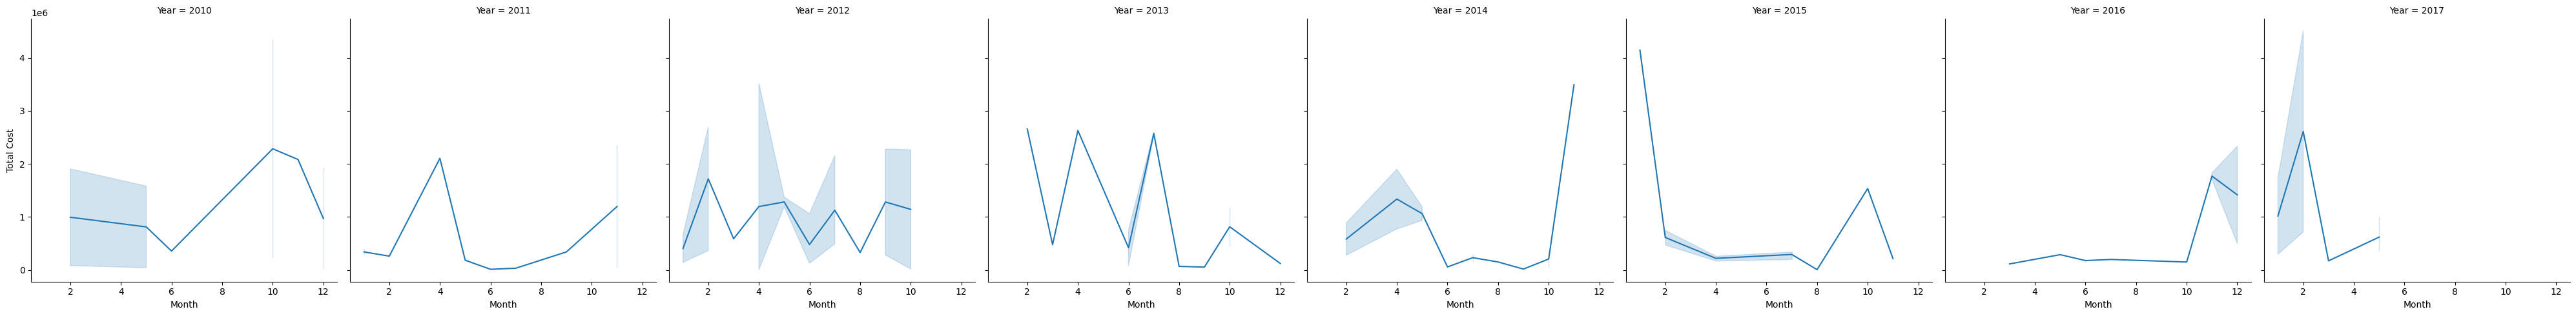

In [ ]:
plt.figure(figsize=(20,8))

sns.relplot(x ='Month',y = 'Total Cost', data=sales_data,height=5,
            kind = 'line', aspect = 1, col = 'Year')
plt.xlabel('Month')
plt.ylabel('Total Cost')
print('Yearly-Monthwise Sales Trend')

<Axes: xlabel='Total Cost', ylabel='Count'>

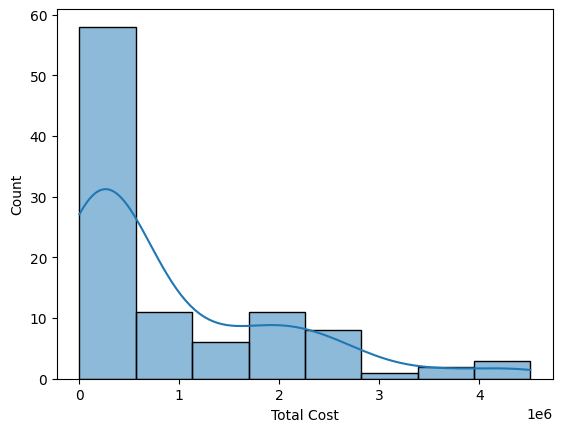

In [ ]:
sns.histplot(sales_data['Total Cost'], kde = True)

<ipython-input-81-d84493708984>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(y ='Units Sold',x = 'Total Cost', data=sales_data,height = 3,aspect=1,


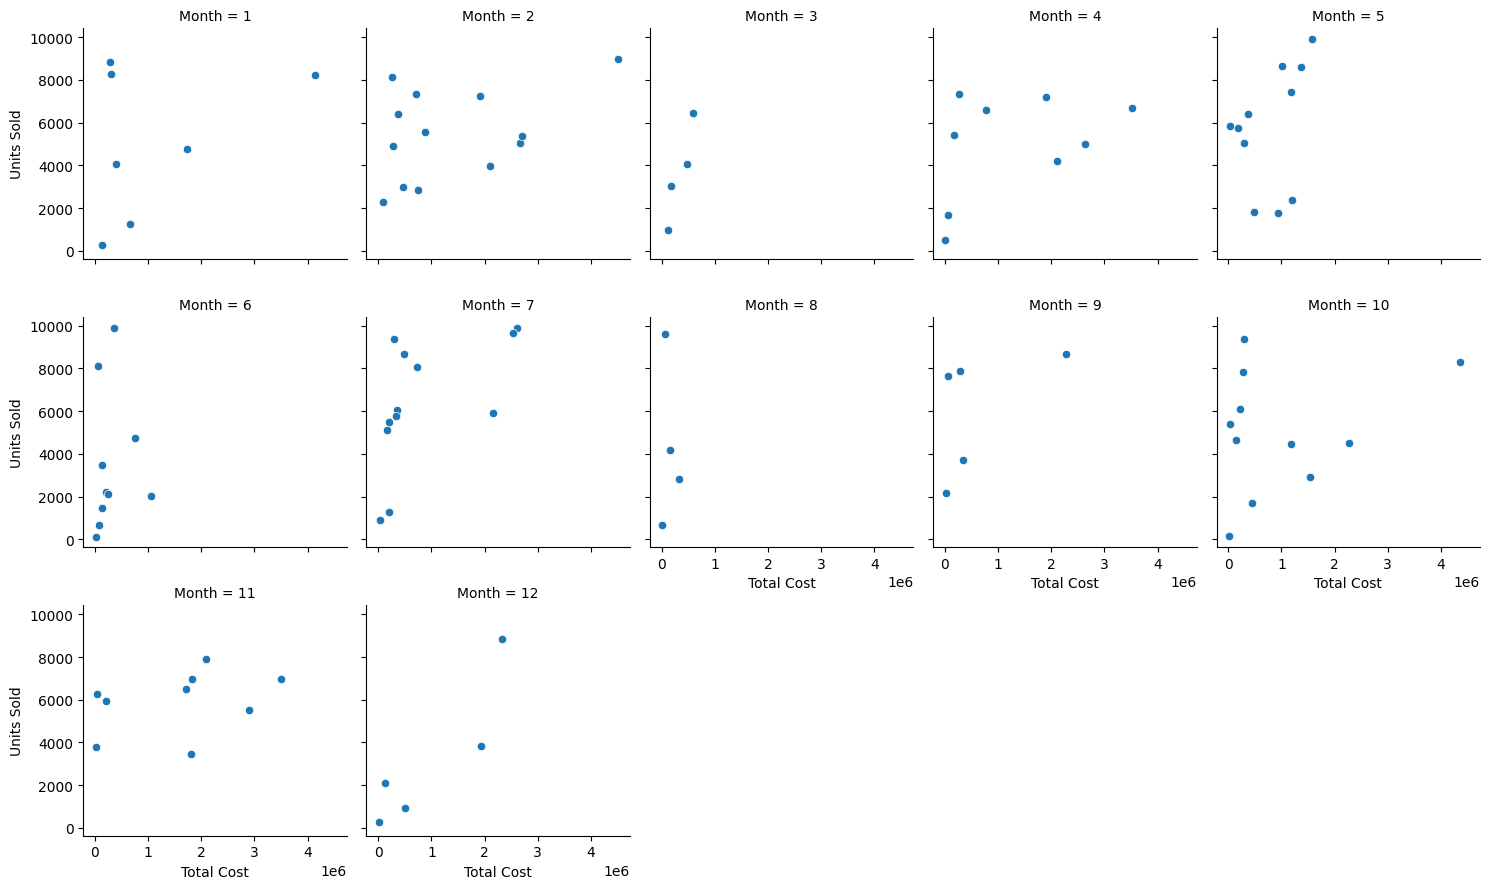

In [ ]:
sns.relplot(y ='Units Sold',x = 'Total Cost', data=sales_data,height = 3,aspect=1,
            col = 'Month',col_wrap=5, palette='muted')